<a href="https://colab.research.google.com/github/dushanranasinghe/Google-Colab/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 214 kB 10.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641025 sha256=d04e6789beaf7372ac02f7600b2d6dfd805e50156e49704f7c48f5d65ac1f538
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [26]:
import pandas as pd
from prophet import Prophet

# Python
df = pd.read_csv('./sample_data/shiba-inu_2020-10-1_2021-10-14.csv')
df.head()

,ds,Open,High,Low,Close,Volume,Market Cap,y
0,Oct-12-2021,0.000029,0.000031,0.000028,0.000029,3.604276e+09,11421153865,0.000029
1,Oct-11-2021,0.000030,0.000031,0.000028,0.000029,6.052580e+09,11657977937,0.000029
2,Oct-10-2021,0.000026,0.000032,0.000026,0.000030,4.335949e+09,11381158136,0.000029
3,Oct-09-2021,0.000027,0.000028,0.000025,0.000026,4.286131e+09,10396853246,0.000026
4,Oct-08-2021,0.000027,0.000030,0.000025,0.000027,8.917137e+09,10734891657,0.000027


In [33]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1825)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2198,2026-10-07
2199,2026-10-08
2200,2026-10-09
2201,2026-10-10
2202,2026-10-11


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2198,2026-10-07,0.000097,0.000073,0.000122
2199,2026-10-08,0.000097,0.000072,0.000122
2200,2026-10-09,0.000098,0.000073,0.000123
2201,2026-10-10,0.000098,0.000074,0.000123
2202,2026-10-11,0.000098,0.000073,0.000123


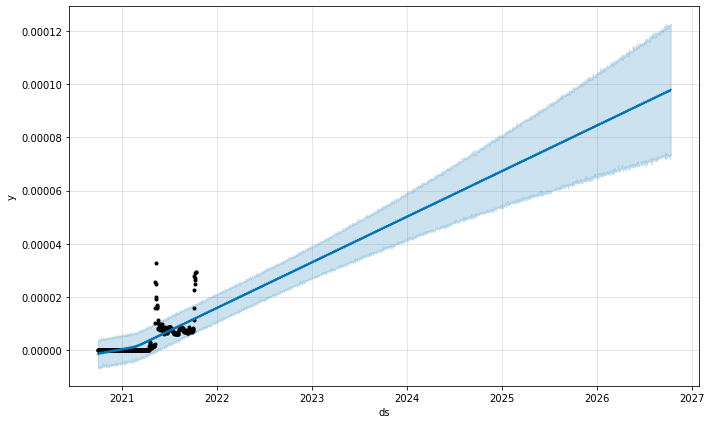

In [35]:
fig1 = m.plot(forecast)
